# Лабораторная работа 1.2
## Вариант 2 
Иванов О. S4102

-------------------

### Задача 1

Случайная величина $\xi$ задана функцией плотности:

\begin{aligned}

f_\xi(x) = 
    \begin{dcases}
    c \cdot cos(x), x \in \begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix} \\
    0, x \notin \begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix}
    \end{dcases}

\end{aligned}

1. Найти коэффициент c

PDF $f(\xi)$ неотрицательна и ее интеграл равен 1 на всем выборочном пространстве. Поскольку $f(\xi)$ равна нулю вне интервала:


\begin{aligned}
\begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix} 
\end{aligned}

для нахождения константы $c$ необходимо проинтегрировать выражение $c \cdot cos(x)$ на интервале

\begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix}

\begin{aligned}

\int_0^\frac{\pi}{4}c \cdot cos(x)dx = 1 \\
c \cdot sin(x) \vert_0^\frac{\pi}{4} = 1 \\
c \cdot sin(\frac{\pi}{4}) - c \cdot sin(0) = 1 \\
c = \frac{1}{sin(\frac{\pi}{4})-sin(0)} \\
c = \frac{1}{\frac{\sqrt2}{2}} \\
c = 1.41

\end{aligned}

In [4]:
import math

constant = 1/(math.sqrt(2)/2)
print(constant)

1.414213562373095


In [5]:
from sympy import *

x, c = symbols('x c')

f = c*cos(x)

integrate(f, (x, (0, pi/4)))

sqrt(2)*c/2

2. Построить функцию распределения $F(\xi)$

Поскольку функция распределения и фнукция плотности определяются формулой: 

\begin{aligned}
    f_\xi(x) = F'_\xi(x)
\end{aligned}

тогда функция распределения для непрерывной случайной величины: 

\begin{aligned}
    F_\xi(x)_ = \int_{-\infin}^\xi f_\xi(x)
\end{aligned}

тогда

\begin{aligned}

F(\xi) = 
    \begin{dcases}
    0, \space x < 0 \\
    \int_0^x 1.4142 \cdot cos(t)dt, \space x \in \begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix} \\
    1, \space x > \frac{\pi}{4}
    \end{dcases}

\end{aligned}

на интервале $x \in \begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix}$ функция распределения будет иметь вид: 

\begin{aligned}
\int_0^\frac{\pi}{4} 1.4142 \cdot cos(t)dt = 1.4142 \cdot sin(x) - 1.4142 \cdot sin(0) = 1.4142 \cdot sin(x)
\end{aligned}

тогда функция распределения:

\begin{aligned}

F(\xi) = 
    \begin{dcases}
    0, \space x < 0 \\
    1.4142 \cdot sin(x), \space x \in \begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix} \\
    1, \space x > \frac{\pi}{4}
    \end{dcases}

\end{aligned}

Построим функцию распределения: 

3. Найти математическое ожидание, дисперсию, медиану

Математическое ожидание: 

\begin{aligned}
    E_\xi = \int_R x \cdot f_\xi(x)dx
\end{aligned}

в данном случае:

\begin{aligned}
    E_\xi = \int_0^{\frac{\pi}{4}} t \cdot с \cdot cos(t) dt
\end{aligned}

Подставляем константу: 

\begin{aligned}
E_\xi = \int_0^\frac{\pi}{4} t \cdot 1.4142 \cdot cos(t)dt = 0.3712
\end{aligned}

In [6]:
import numpy as np
from scipy.integrate import quad

f = lambda x: x * constant * np.cos(x)

expected_value, error = quad(f, 0, np.pi/4)
print(expected_value)

0.37118460102435324


Найдем дисперсию, используя эквивалентное выражение: 

\begin{aligned}
    var(X) = E[(X-E[X])^2] = E[X^2] - (E[X])^2
\end{aligned}

где

\begin{aligned}
    E[X^2] = \int_{-\infty}^{+\infty} x^2f(x)dx
\end{aligned}

\begin{aligned}
E_\xi[X^2] = \int_0^\frac{\pi}{4} t^2 \cdot 1.4142 \cdot cos(t)dt = 0.1876
\end{aligned}

In [7]:
import numpy as np
from scipy.integrate import quad

f = lambda x: x**2 * constant * np.cos(x)

E_X_squared, error = quad(f, 0, np.pi/4)
print(E_X_squared)

0.1876466018629815


Тогда дисперсия равна: 

\begin{aligned}
    var(X) = E[(X-E[X])^2] = E[X^2] - (E[X])^2 = 0.1876 - 0.3712^2 = 0.0499
\end{aligned}

In [8]:
variance = E_X_squared - expected_value**2
print(variance)

0.049868593825373175


Чтобы найти медиану, проинтегрируем PDF от $0$ до $m$

\begin{aligned}
   \int_0^m f_\xi(x)dx = \frac{1}{2} \\
   \int_0^m c \cdot cos(x)dx = \frac{1}{2} \\
   c \cdot cos(m) \vert_0^m = \frac{1}{2} \\
   c \cdot sin(m) = \frac{1}{2} \\ 
   sin(m) = \frac{\frac{1}{2}}{1.4142} \\
   m = sin^{-1}(\frac{\frac{1}{2}}{1.4142}) \\
   m = 0.3614
\end{aligned}

In [9]:
np.arcsin((1/2)/constant)

0.36136712390670783

4. Найти вероятность $P(\xi > \frac{\pi}{6})$

$\frac{\pi}{6}$ входит в интервал 

\begin{bmatrix} 0, \frac{\pi}{4} \end{bmatrix}

Вероятность того, что случайная величина $\xi$ больше $\frac{\pi}{6}$ равна 1 - вероятность того, что случайная величина $\xi$ меньше или равна $\frac{\pi}{6}$

\begin{aligned}

    P(\xi > \frac{\pi}{6}) = 1 - P(\xi \le \frac{\pi}{6})

\end{aligned}

\begin{aligned}

P(\xi > \frac{\pi}{6}) = 1 - \int_0^\frac{\pi}{6} 1.4142 \cdot cos(x)dx = 1 - (1.4142 \cdot sin(\frac{\pi}{6}) - 1.4142 \cdot sin(0)) = 1 - 1.4142 \cdot sin(\frac{\pi}{6}) = 0.2929

\end{aligned}

In [10]:
import numpy as np
from scipy.integrate import quad

# Define the constant and the PDF
c = constant
f = lambda t: c * np.cos(t)

# Calculate P(X <= π/6)
prob_less_than_pi_over_6, _ = quad(f, 0, np.pi/6)

# Calculate P(X > π/6)
prob_greater_than_pi_over_6 = 1 - prob_less_than_pi_over_6

print(prob_greater_than_pi_over_6)

0.29289321881345265


 5. Графики CDF и PDF

График функции распределения (CDF)

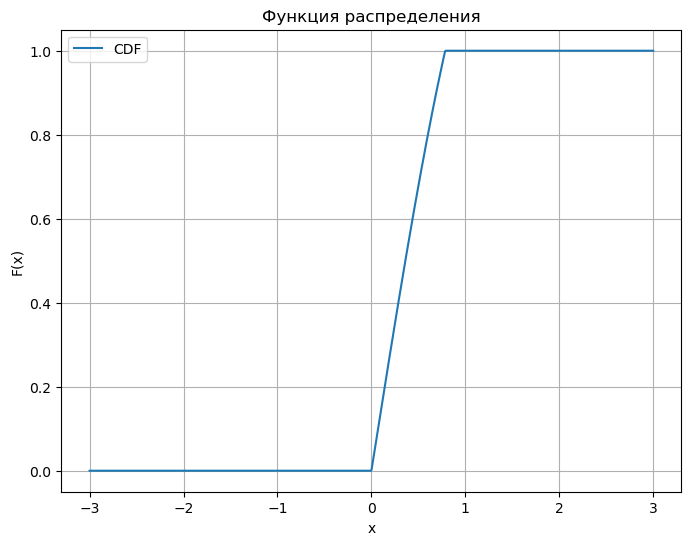

In [21]:
import numpy as np
import matplotlib.pyplot as plt

constant = constant

def cdf(x):
    return np.piecewise(
        x,
        [x < 0, (x >= 0) & (x <= np.pi/4), x > np.pi/4],
        [0, lambda x: constant*np.sin(x), 1]
        )

x_values = np.linspace(-3, 3, 1000)

vF = np.vectorize(cdf)

y_values = vF(x_values)

plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, label='CDF')
plt.title('Функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()

График функции плотности (PDF)

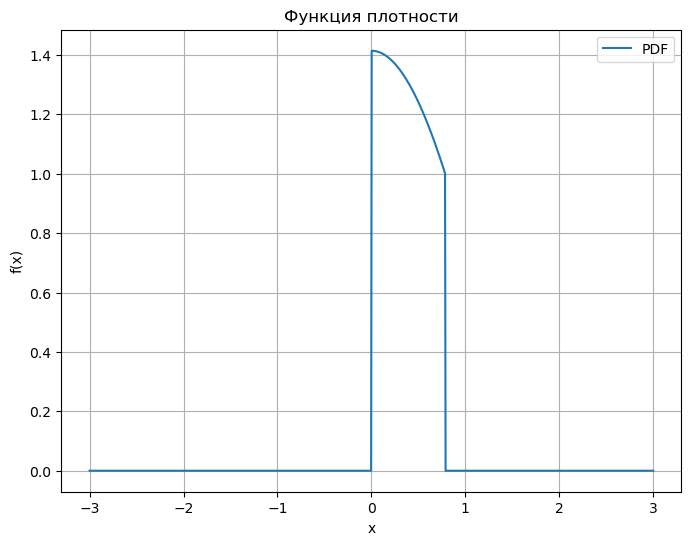

In [114]:
import numpy as np
import matplotlib.pyplot as plt

constant = constant

def pdf(x):
    return np.piecewise(
        x,
        [x < 0, (x >= 0) & (x <= np.pi/4), x > np.pi/4],
        [0, lambda x: constant*np.cos(x), 0]
        )

x_values = np.linspace(-3, 3, 1000)

vF = np.vectorize(pdf)

y_values = vF(x_values)

plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, label='PDF')
plt.title('Функция плотности')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

6. Сгенерировать выборку из 1000 элементов, отобразить PDF и CDF на одном графике

<function matplotlib.pyplot.show(close=None, block=None)>

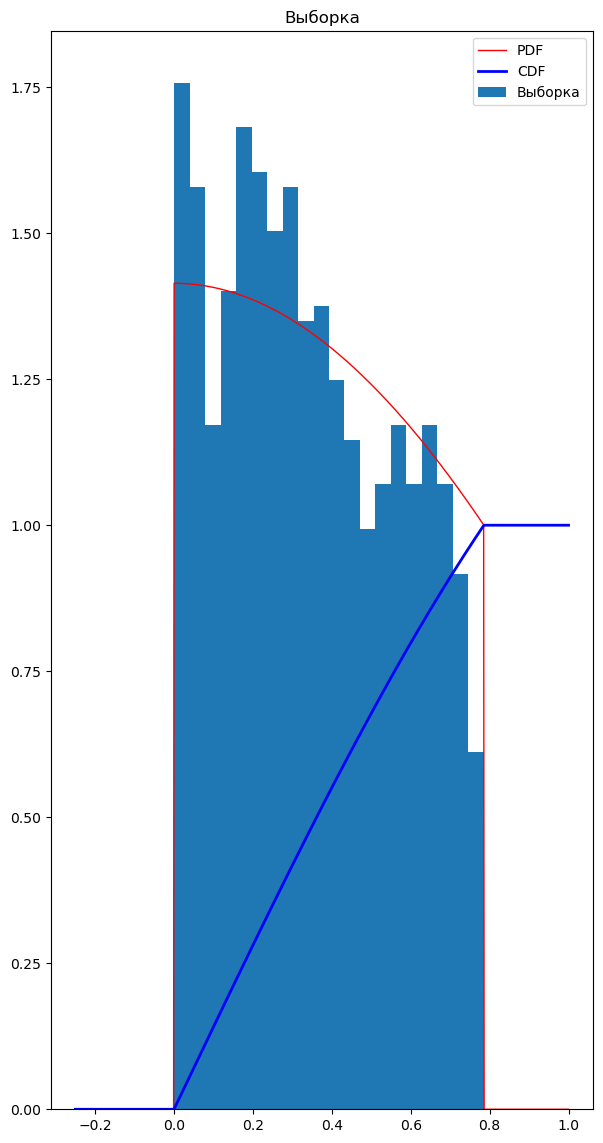

In [120]:
import scipy.stats as st

class my_pdf(st.rv_continuous):
    def _pdf(self, x, c):
        if x >= 0 and x <= np.pi/4:
            return c * np.cos(x)
        else:
            return 0

pdf = my_pdf(a=0, b=np.pi/4, name='pdf')

n = 1000

uniform = np.random.rand(n)
samples = pdf.rvs(constant, size=n)

def pdf_f(x):
    return np.piecewise(
        x,
        [x < 0, (x >= 0) & (x <= np.pi/4), x > np.pi/4],
        [0, lambda x: constant*np.cos(x), 0]
        )

def cdf(x):
    return np.piecewise(
        x,
        [x < 0, (x >= 0) & (x <= np.pi/4), x > np.pi/4],
        [0, lambda x: constant*np.sin(x), 1]
        )

x_values = np.linspace(-0.25, 1, 1000)
vF = np.vectorize(pdf_f)
vFc = np.vectorize(cdf)

pdf_values = vF(x_values)
cdf_values = vFc(x_values)

# Plot the PDF and CDF
fig = plt.figure(figsize=(7, 14))
ax  = fig.add_subplot(111)
plt.plot(x_values, pdf_values, lw=1, color = 'r', label='PDF')
plt.plot(x_values, cdf_values, lw=2, color = 'b', label='CDF')
plt.title('Выборка')
plt.hist(samples, bins=20, label='Выборка', density=True)
plt.legend()
plt.show

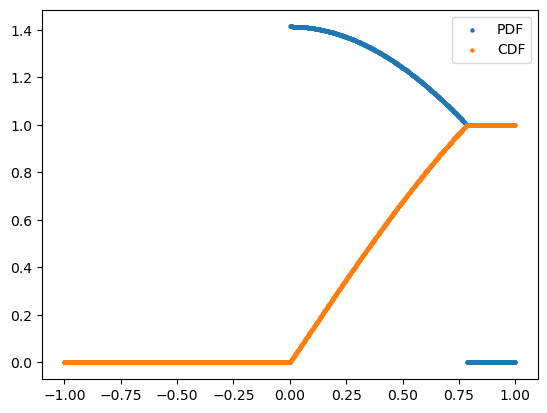

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


PDF = lambda t: c * np.cos(t) if 0 <= t <= np.pi/4 else 0
CDF = lambda t: 0 if t < 0 else 1 if t > np.pi/4 else quad(PDF, 0, t)[0]

x = np.linspace(-1,1, n)

pdf_y=[PDF(t) for t in x]
cdf_y = [CDF(t) for t in x]

plt.scatter(x, pdf_y, label='PDF', s=5)
plt.scatter(x, cdf_y, label='CDF', s=5)
plt.legend()
plt.show()

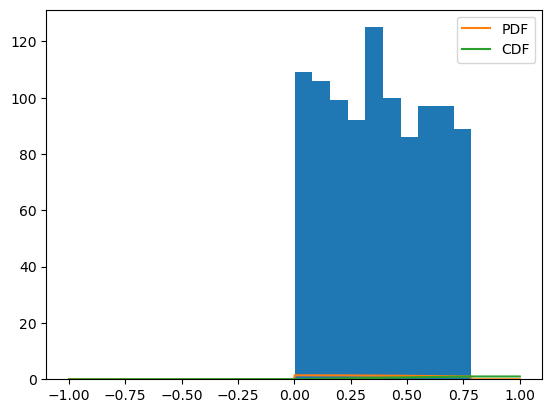

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# class custom_dist(st.rv_continuous):
#     def _pdf(self, x):
#         return np.piecewise(
#         x,
#         [x < 0, (x >= 0) & (x <= np.pi/4), x > np.pi/4],
#         [0, lambda x: constant*np.cos(x), 1]
#         )

# distr = custom_dist(a=0, b=np.pi/4, name='custom_distribution')

# size = 1000

# samples = distr.rvs(size=size)

PDF = lambda t: c * np.cos(t) if 0 <= t <= np.pi/4 else 0
CDF = lambda t: 0 if t < 0 else 1 if t > np.pi/4 else quad(PDF, 0, t)[0]

x = np.linspace(-1,1, 1000)

pdf_y=[PDF(t) for t in x]
cdf_y = [CDF(t) for t in x]

plt.hist(samples)
plt.plot(x, pdf_y, label='PDF')
plt.plot(x, cdf_y, label='CDF')
plt.legend()
plt.show()

----------------------

### Задача 2

Время ожидания автобуса для каждого пассажира есть равномерно распредленная случайная величина. Автобусы ходят с интервалом 10 минут. Какова вероятность того, что 3 пассжаира, оказавшиеся на остановке в случайный момент времени, ожидают автобус не более 3 минут.

Пространство событий лежит в интервале 10 минут. Таким образом, вероятность того, что пассажир будет ждать автобус не более X минут равна отношению X/10. Таким образом, вероятность того, что один пассажир будет ждать автобус не более 3 минут будет 3/10. Поскольку события "пассажир пришел на остановку" независимы и случайны, вероятность трех событий будет равна произведению их вероятностей.

Таким образом:

$$
    P = P_1 \cdot P_2 \cdot P_3 = \frac{3}{10} \cdot \frac{3}{10} \cdot \frac{3}{10} = 0.027
$$

Числовое решение

Смоделируем эксперимент. воспользовавшись генератором нормального распределения в библиотеке numpy:

In [16]:
import numpy as np

def simulate_waiting_times(trials):
    count = 0
    for _ in range(trials):
        passenger1 = np.random.uniform(0, 10)
        passenger2 = np.random.uniform(0, 10)
        passenger3 = np.random.uniform(0, 10)
        
        if passenger1 <= 3 and passenger2 <= 3 and passenger3 <= 3:
            count += 1
    return count / trials

p = simulate_waiting_times(1000000)
print(f"Вероятность того, что 3 пассажира, \nоказавшиеся на остановке в случайный момент времени,\nожидают автобус не более 3 минут: {p}")


Вероятность того, что 3 пассажира, 
оказавшиеся на остановке в случайный момент времени,
ожидают автобус не более 3 минут: 0.026895


-----------------------

### Задача 3

Ошибка измерения расстояния подчинена нормальному закону. Математическое ожидание и среднеквадратическое отклонение этой ошибки равны соответственно 5 м и 10 м. Найти вероятности того, что измеренное значение дальности будет отклоняться от истинного не более, чем на 15 м. 

$$
    f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

$$
   P = \int_0^{15} f(x)
$$

$$
   P = \int_0^{15}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

Однако для элементарных функций CDF не выражается, поэтому перейдем от $X$ к $Z$

Нас интересуют значения в интервале от $\mu - 15$ до $\mu + 15$

Вычислим z-score

$$
    Z_{score} = \frac{\mu \pm 15-\mu}{\sigma}
$$

Для значения $X = \mu - 15$:

$$
Z_{score} = \frac{5 - 15  - 5}{10} = - 1.5
$$

Для значения $X = \mu + 15$:

$$
Z_{score} = \frac{5 + 15 - 5}{10} = 1.5
$$

Тогда вероятность $P$ того, что $X \le 15$ равна $P(-1.5<Z\le1.5)$

Воспользовавшись таблицей площади под графиком слева от Z, получим:

$$
P(-1.5<Z\le1.5) = P(Z\le1.5)-P(Z>-1.5) = 0.9332 - 0.0668 = 0.8664
$$

In [107]:
from scipy.stats import norm

mu = 5  
sigma = 10 
deviation = 15 

z_score_lower = (mu - deviation - mu) / sigma
z_score_upper = (mu + deviation - mu) / sigma

probability_lower = norm.cdf(z_score_lower)
probability_upper = norm.cdf(z_score_upper)

probability_within_deviation = probability_upper - probability_lower

print(f"Вероятность: {probability_within_deviation:.4f}")


Вероятность: 0.8664


#### Числовое решение

In [112]:
### Задача 3

mu = 5
sigma = 10
limit = 15
sample_size = 1000000

s = np.random.normal(mu, sigma, sample_size)

probability = np.sum(np.abs(s - mu) <= limit) / sample_size

print(f'Вероятность того, что случайная величина\nменьше или равна {limit}: {probability}')

Вероятность того, что случайная величина
меньше или равна 15: 0.866134


--------------

### Задача 4

Вероятность попадания в цель при одном выстреле равна 0.001. Для поражения цели необходимо не менее двух попаданий. Произведено 5000 выстрелов. Найдите вероятность поражения цели. 

Имеем дело с биномиальным распределением

$$
\begin{array}{c|c|c|c|c|c}\xi & 0 & 1 & \ldots & n - 1 & n  \\\hline\mathsf P & (1-p)^n & C_n^1p(1 - p)^{n-1} & \ldots & C_n^{n - 1}p^{n-1}(1-p) & p^n\end{array}
$$

PMF для биномиального распределения:

$$
    f(k,n,p) = P(k,n,p) = \binom{n}{k}p^k(1-p)^{n-k}
$$

Для данного случая имеем обратное условие $k<2$

Параметры, исходя из условия задачи:

$$

    k < 2 \\
    n = 5000 \\
    p = 0.001 \\

$$

Тогда вероятность искомого события будет равна $1-P(при\space k<2)$

$$
 P(при\space k<2) = 1 - (P(1) + P(0)) = 0.040
$$

In [18]:
from functools import reduce
import operator

n = 5000
p = 0.001

def combinations(n, k):
    return math.factorial(n)/(math.factorial(k) * math.factorial(n-k))

cum_prob = []

for k in range(0,2):
    probability = combinations(n, k)*(p**k)*(1-p)**(n-k)
    cum_prob.append(probability)

total_prob = 1
total_prob = sum(cum_prob)
print(f'Вероятность: {total_prob}')

Вероятность: 0.040360310958191856


#### Числовое решение

<BarContainer object of 16 artists>

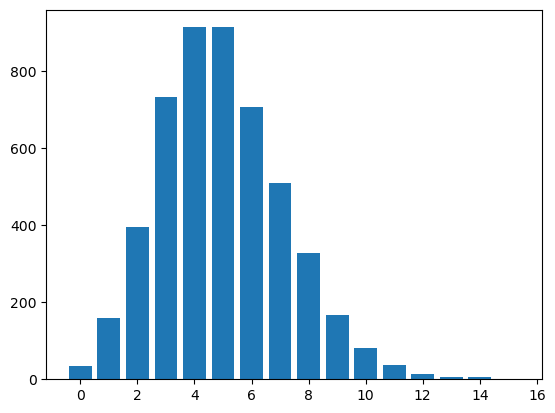

In [19]:
from collections import Counter

n, p = 5000, 0.001
s = np.random.binomial(n, p, 5000)
res = Counter(s)
plt.bar(res.keys(), res.values())

In [20]:
probability = (res.get(1) + res.get(0))/sum(res.values())
print(probability)

0.0384
